In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [3]:
sns.set_theme(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [16]:
# load dataset
spotify_df = pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/track_features_with_track_id.csv")

spotify_df = spotify_df[spotify_df['danceability'] != -1]

spotify_df.head()

,track_id,spotify_uri,danceability,energy,instrumentalness,acousticness,tempo,valence,key,liveness,loudness,mode,speechiness,time_signature
0,47511869,4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.5910,129.062,0.720,0,0.0992,-7.036,1,0.0370,4
1,32496162,4G8gkOterJn0Ywt6uhqbhp,0.448,0.784,0.000108,0.0999,136.239,0.237,9,0.6680,-3.686,1,0.0625,4
2,33614747,1c8gk2PeTE04A1pIDH9YMk,0.730,0.769,0.000000,0.1380,104.948,0.507,8,0.0473,-5.114,1,0.0298,4
3,32083560,7w87IxuO7BDcJ3YUqCyMTT,0.733,0.710,0.115000,0.1450,127.975,0.965,5,0.0956,-5.849,0,0.0292,4
4,45222862,6mFkJmJqdDVQ1REhVfGgd1,0.481,0.262,0.011400,0.7350,122.861,0.375,7,0.8320,-15.730,1,0.0414,4


In [17]:
# get only children songs

children_songs_only = pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Filtered_Data/left_songs.csv")

to_keep = set()

for x in children_songs_only['track_id']:
    to_keep.add(x)

spotify_df = spotify_df[spotify_df['track_id'].isin(to_keep)]

print(len(spotify_df))

844339


In [18]:
import umap

reducer = umap.UMAP()

/Users/str1ct0wn3r/Documents/RP/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# scale feature
music_data = spotify_df[["danceability", "energy", "instrumentalness", "acousticness", "tempo", "valence"]].values
scaled_music_data = StandardScaler().fit_transform(music_data)

In [20]:
embedding = reducer.fit_transform(scaled_music_data)
embedding.shape

(844339, 2)

In [23]:
print(embedding)

[[16.676836   7.8088374]
 [ 7.4739857 12.616061 ]
 [16.633657  12.8227415]
 ...
 [13.868659  15.640669 ]
 [16.196331   8.140945 ]
 [ 5.7251616 12.362089 ]]


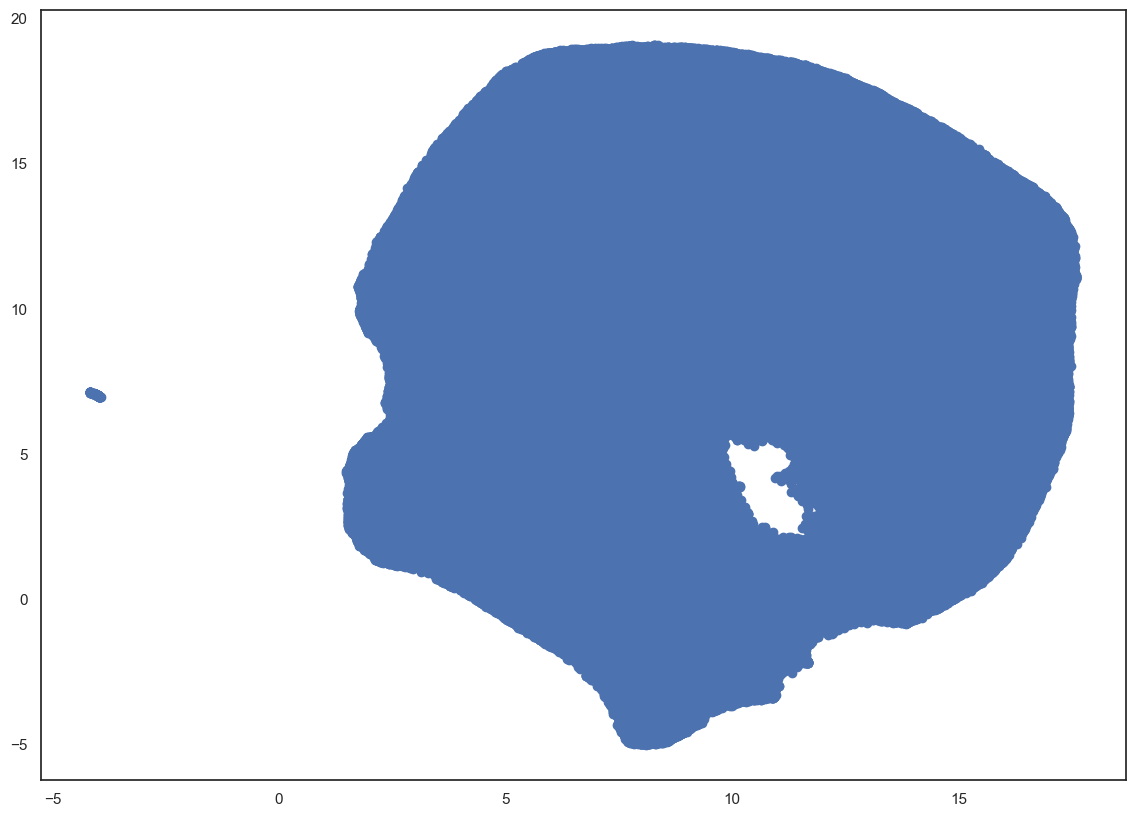

In [24]:
import matplotlib.pyplot as plt

plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
    )